In [1]:
import pandas as pd
raw_data = pd.read_csv('prostate.data.txt', delimiter='\t')
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data.iloc[:,1:-3],  raw_data.iloc[:,-2]
, train_size=0.8)





C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
X_train.shape


(77, 7)

In [24]:
X_test.shape


(20, 7)

In [25]:
#standardisé les variables
from sklearn import preprocessing
sata = preprocessing.StandardScaler().fit(X_train)
x_scale = sata.transform(X_train)


In [26]:
#standardisé les variables
sataee = preprocessing.StandardScaler().fit(X_test)
x_scale_test = sata.transform(X_test)




In [33]:
#cree un model de regression linear non optimisé
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(x_scale,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(x_scale_test) - y_test) ** 2)

print(baseline_error)

0.5360708499742961


In [45]:
#regression ridge

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
ridge = linear_model.Ridge()
coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

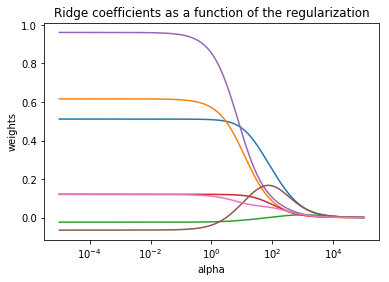

In [47]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

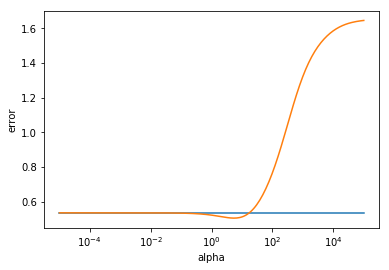

In [48]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [49]:
min(errors)


[0.5360708499742961, 0.5056142867674898]

In [53]:
np.argmin(errors)
#AFFICHE 25
alphas[25]

0.00018041864093920718

In [56]:
#LA REGRESSION lasso
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

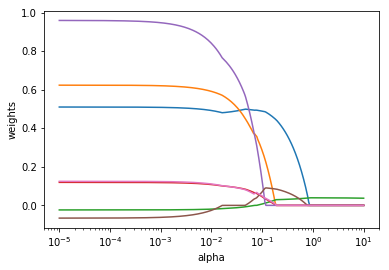

In [58]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

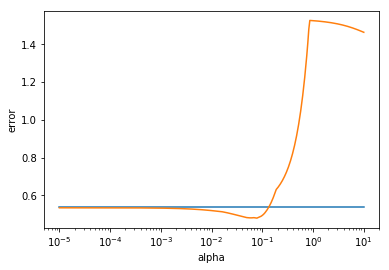

In [67]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [61]:
min(errors)


[0.5360708499742961, 0.4795304509407002]

In [70]:
np.argmin(errors)
#AFFICHE 389



AttributeError: 'list' object has no attribute 'shape'